# Compare NLP Techniques: Build A Basic RNN

### Read In Cleaned Text

In [2]:
# Load the cleaned training and test sets
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv')
y_test = pd.read_csv('data/y_test.csv')

### Prep Data

In [3]:
# Train the tokenizer and use that tokenizer to convert the sentences to sequences of numbers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['clean_text'])
X_train_seq = tokenizer.texts_to_sequences(X_train['clean_text'])
X_test_seq = tokenizer.texts_to_sequences(X_test['clean_text'])

In [4]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq , 50 )
X_test_seq_padded = pad_sequences(X_test_seq , 50)

### Build And Evaluate RNN

In [5]:
# Import the tools needed and use our previously defined functions to calculate precision and recall
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [6]:
# Construct our basic RNN model framework
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          221760    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 231,169
Trainable params: 231,169
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',precision_m,recall_m])

In [11]:
# Fit the RNN
history = model.fit(X_train_seq_padded, y_train['label'], 
                    batch_size=32, epochs=10,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/10
140/140 [==============================] - 6s 18ms/step - loss: 0.2542 - accuracy: 0.9179 - precision_m: 0.5196 - recall_m: 0.4188 - val_loss: 0.0612 - val_accuracy: 0.9830 - val_precision_m: 0.9162 - val_recall_m: 0.9018
Epoch 2/10
140/140 [==============================] - 2s 13ms/step - loss: 0.0391 - accuracy: 0.9906 - precision_m: 0.9662 - recall_m: 0.9228 - val_loss: 0.0479 - val_accuracy: 0.9874 - val_precision_m: 0.9467 - val_recall_m: 0.9164
Epoch 3/10
140/140 [==============================] - 2s 13ms/step - loss: 0.0179 - accuracy: 0.9953 - precision_m: 0.9649 - recall_m: 0.9479 - val_loss: 0.0509 - val_accuracy: 0.9865 - val_precision_m: 0.9500 - val_recall_m: 0.9021
Epoch 4/10
140/140 [==============================] - 2s 13ms/step - loss: 0.0086 - accuracy: 0.9973 - precision_m: 0.9826 - recall_m: 0.9717 - val_loss: 0.0561 - val_accuracy: 0.9865 - val_precision_m: 0.9548 - val_recall_m: 0.8878
Epoch 5/10
140/140 [==============================] - 2s 14ms/step -

In [ ]:
precision 0.9476 
recall 0.8926
accuracy 0.9865

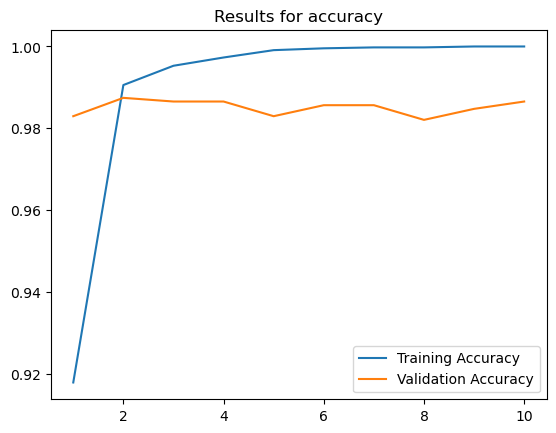

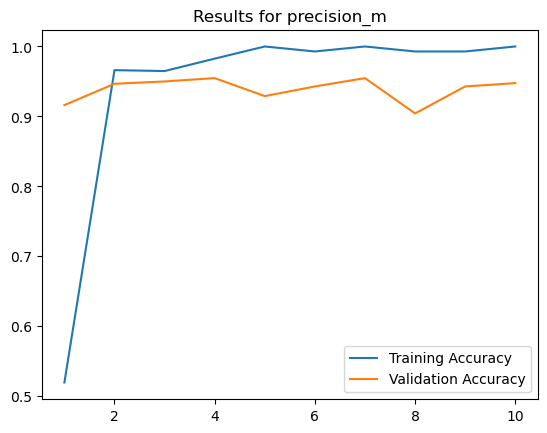

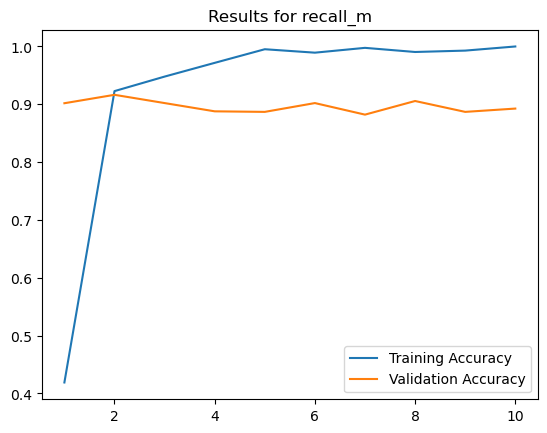

In [12]:
# Plot basic evaluation metrics across epochs
import matplotlib.pyplot as plt
%matplotlib inline

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()